In [1]:
from google.colab import drive
drive.mount('/content/drive')
path = "drive/MyDrive/DataSet"

Mounted at /content/drive


In [2]:
import os
path = "drive/MyDrive/HuanData"

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt

In [3]:
data_county_year = pd.read_csv(path + "/Quack Quack/climdiv_county_year_SE.csv")
data_county_year['fips_05'] = data_county_year['fips_05'].str.replace('"','')

In [4]:
data_county_year['fips_05'] = data_county_year['fips_05'].astype(str).replace('"','')
data_county_year['fips_02'] = data_county_year['fips_05'].astype(str).str[:2]

col_to_move = data_county_year.pop('fips_02')
data_county_year.insert(0, 'fips_02', col_to_move)

In [5]:
data_county_year.describe()

,year,temp,tempc
count,388375.000000,388375.000000,388375.000000
mean,1957.000000,53.995737,12.219854
std,36.083284,8.431610,4.684228
min,1895.000000,30.508333,-0.828704
25%,1926.000000,47.650000,8.694444
50%,1957.000000,53.908333,12.171296
75%,1988.000000,60.533333,15.851852
max,2019.000000,78.816667,26.009259


In [6]:
data_county_year = data_county_year.sort_values(by='year', ascending=True)
# Choose a state
f1 = data_county_year[data_county_year['fips_02'] == '10']

In [7]:
f1

,fips_02,fips_05,year,temp,tempc
36125,10,10005,1895,53.300000,11.833333
35875,10,10001,1895,52.508333,11.393519
36000,10,10003,1895,51.775000,10.986111
36126,10,10005,1896,54.475000,12.486111
35876,10,10001,1896,53.716667,12.064815
...,...,...,...,...,...
36123,10,10003,2018,55.675000,13.152778
36248,10,10005,2018,58.033333,14.462963
35999,10,10001,2019,57.150000,13.972222
36249,10,10005,2019,58.391667,14.662037


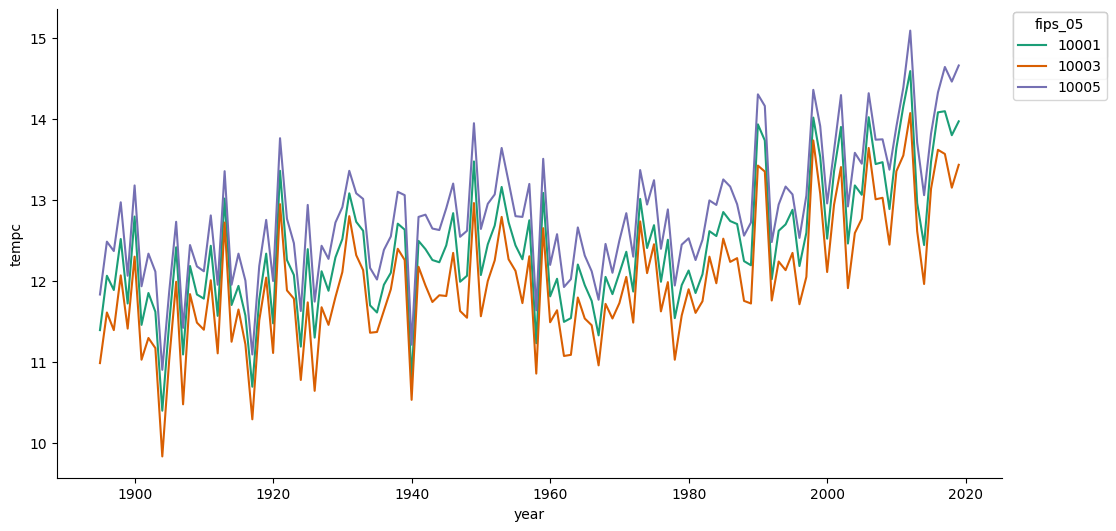

In [8]:
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['year']
  ys = series['tempc']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = f1.sort_values('year', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('fips_05')):
  _plot_series(series, series_name, i)
  fig.legend(title='fips_05', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('year')
_ = plt.ylabel('tempc')

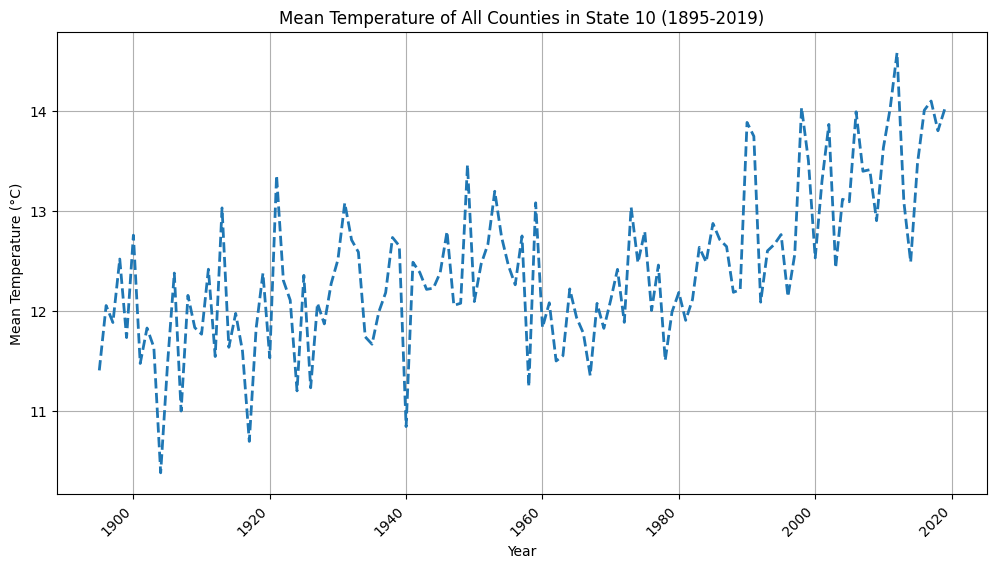

In [9]:
# Assuming 'data_county_year' is your DataFrame containing temperature data

# State selection (can be replaced with user input)
state = '10'

# Filter data by state and year range (1895-2019)
state_data = data_county_year[(data_county_year['fips_02'] == state) &
                              (data_county_year['year'] >= 1895) &
                              (data_county_year['year'] <= 2019)]

# Group by year and calculate mean temperature
mean_temp_by_year = state_data.groupby('year')['tempc'].mean().reset_index()

# Extract year and temperature data
years = mean_temp_by_year['year']
mean_temp = mean_temp_by_year['tempc']

# Create the line chart
plt.figure(figsize=(12, 6))
plt.plot(years, mean_temp, linestyle='dashed', linewidth=2)
plt.xlabel('Year')  # Corrected label
plt.ylabel('Mean Temperature (°C)')
plt.title(f'Mean Temperature of All Counties in State {state} (1895-2019)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.grid(True)

plt.show()

In [10]:
data_state_year = pd.read_csv(path + "/Quack Quack/climdiv_state_year.csv")

In [11]:
# Add a O to fips
data_state_year['fips'] = data_state_year['fips'].astype(str).apply(lambda x: f"0{x}" if len(x) == 1 else x)
print(data_state_year)

     fips  year       temp      tempc
0      01  1895  61.641667  16.467593
1      01  1896  64.266667  17.925926
2      01  1897  64.191667  17.884259
3      01  1898  62.983333  17.212963
4      01  1899  63.100000  17.277778
...   ...   ...        ...        ...
5995   56  2015  44.158333   6.754630
5996   56  2016  43.908333   6.615741
5997   56  2017  43.200000   6.222222
5998   56  2018  42.408333   5.782407
5999   56  2019  40.383333   4.657407

[6000 rows x 4 columns]


In [12]:
data_state_year.describe()

,year,temp,tempc
count,6000.000000,6000.000000,6000.000000
mean,1957.000000,51.615301,10.897390
std,36.086244,8.005998,4.447777
min,1895.000000,34.900000,1.611111
25%,1926.000000,45.181250,7.322917
50%,1957.000000,50.770833,10.428241
75%,1988.000000,57.556250,14.197917
max,2019.000000,73.358333,22.976852


<Axes: xlabel='year'>

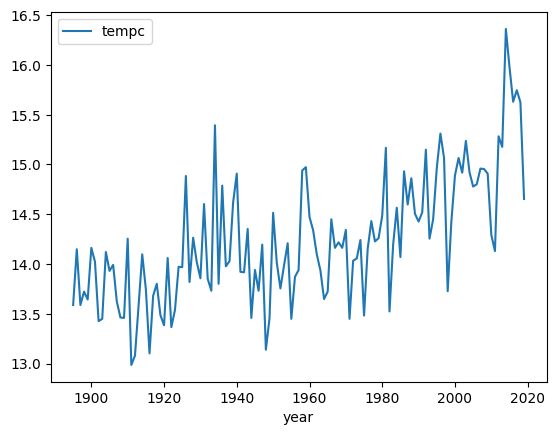

In [13]:
f2 = data_state_year[data_state_year['fips'] == '06']
f2_copy = f2[['year','tempc']]
f2_copy.set_index('year', inplace=True)
f2_copy.plot()

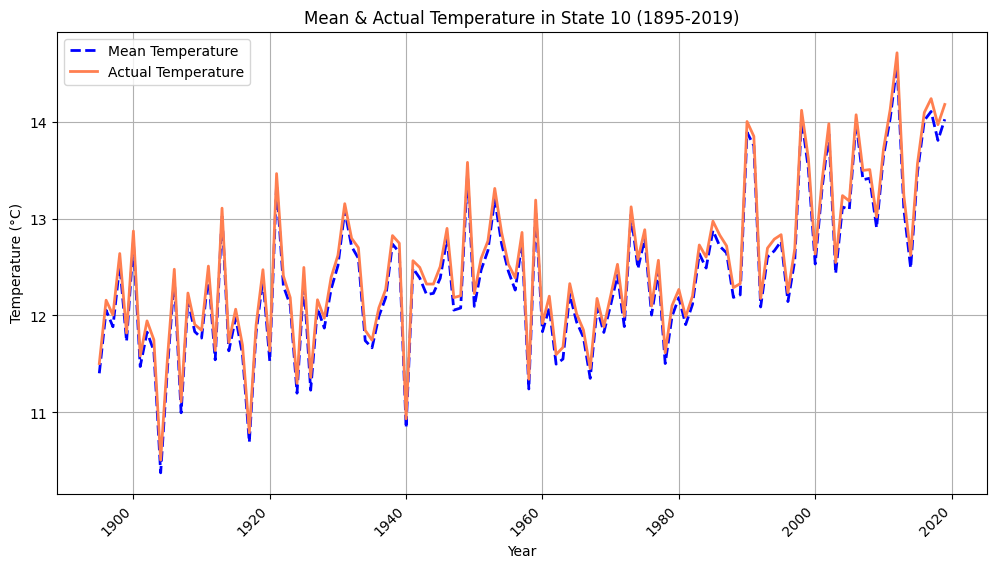

In [14]:
# State selection (can be replaced with user input)
state = '10'

# Filter data for state and year range (1895-2019) in county data
state_data = data_county_year[(data_county_year['fips_02'] == state) &
                              (data_county_year['year'] >= 1895) &
                              (data_county_year['year'] <= 2019)]

# Group by year and calculate mean temperature (county data)
mean_temp_by_year = state_data.groupby('year')['tempc'].mean().reset_index()

# Extract data for county data
years = mean_temp_by_year['year']
mean_temp = mean_temp_by_year['tempc']

# Filter data for state and year range in state data (assuming 'fips' is the state identifier)
state_data = data_state_year[(data_state_year['fips'] == state) &
                              (data_state_year['year'] >= 1895) &
                              (data_state_year['year'] <= 2019)]

# Extract data for state data
state_years = state_data['year']
state_temp = state_data['tempc']

# Define color palette for better visualization
colors = ['blue', 'coral']  # Blue for mean temperature, coral for actual temperature

# Create the line chart with two lines
plt.figure(figsize=(12, 6))

# Plot mean temperature line (dashed)
plt.plot(years, mean_temp, label='Mean Temperature', linestyle='dashed', linewidth=2, color=colors[0])

# Plot actual temperature line (solid)
plt.plot(state_years, state_temp, label='Actual Temperature', linewidth=2, color=colors[1])

plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.title(f'Mean & Actual Temperature in State {state} (1895-2019)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.grid(True)
plt.legend()  # Add legend to distinguish lines

plt.show()

<ipython-input-15-d6f044a6b465>:22: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


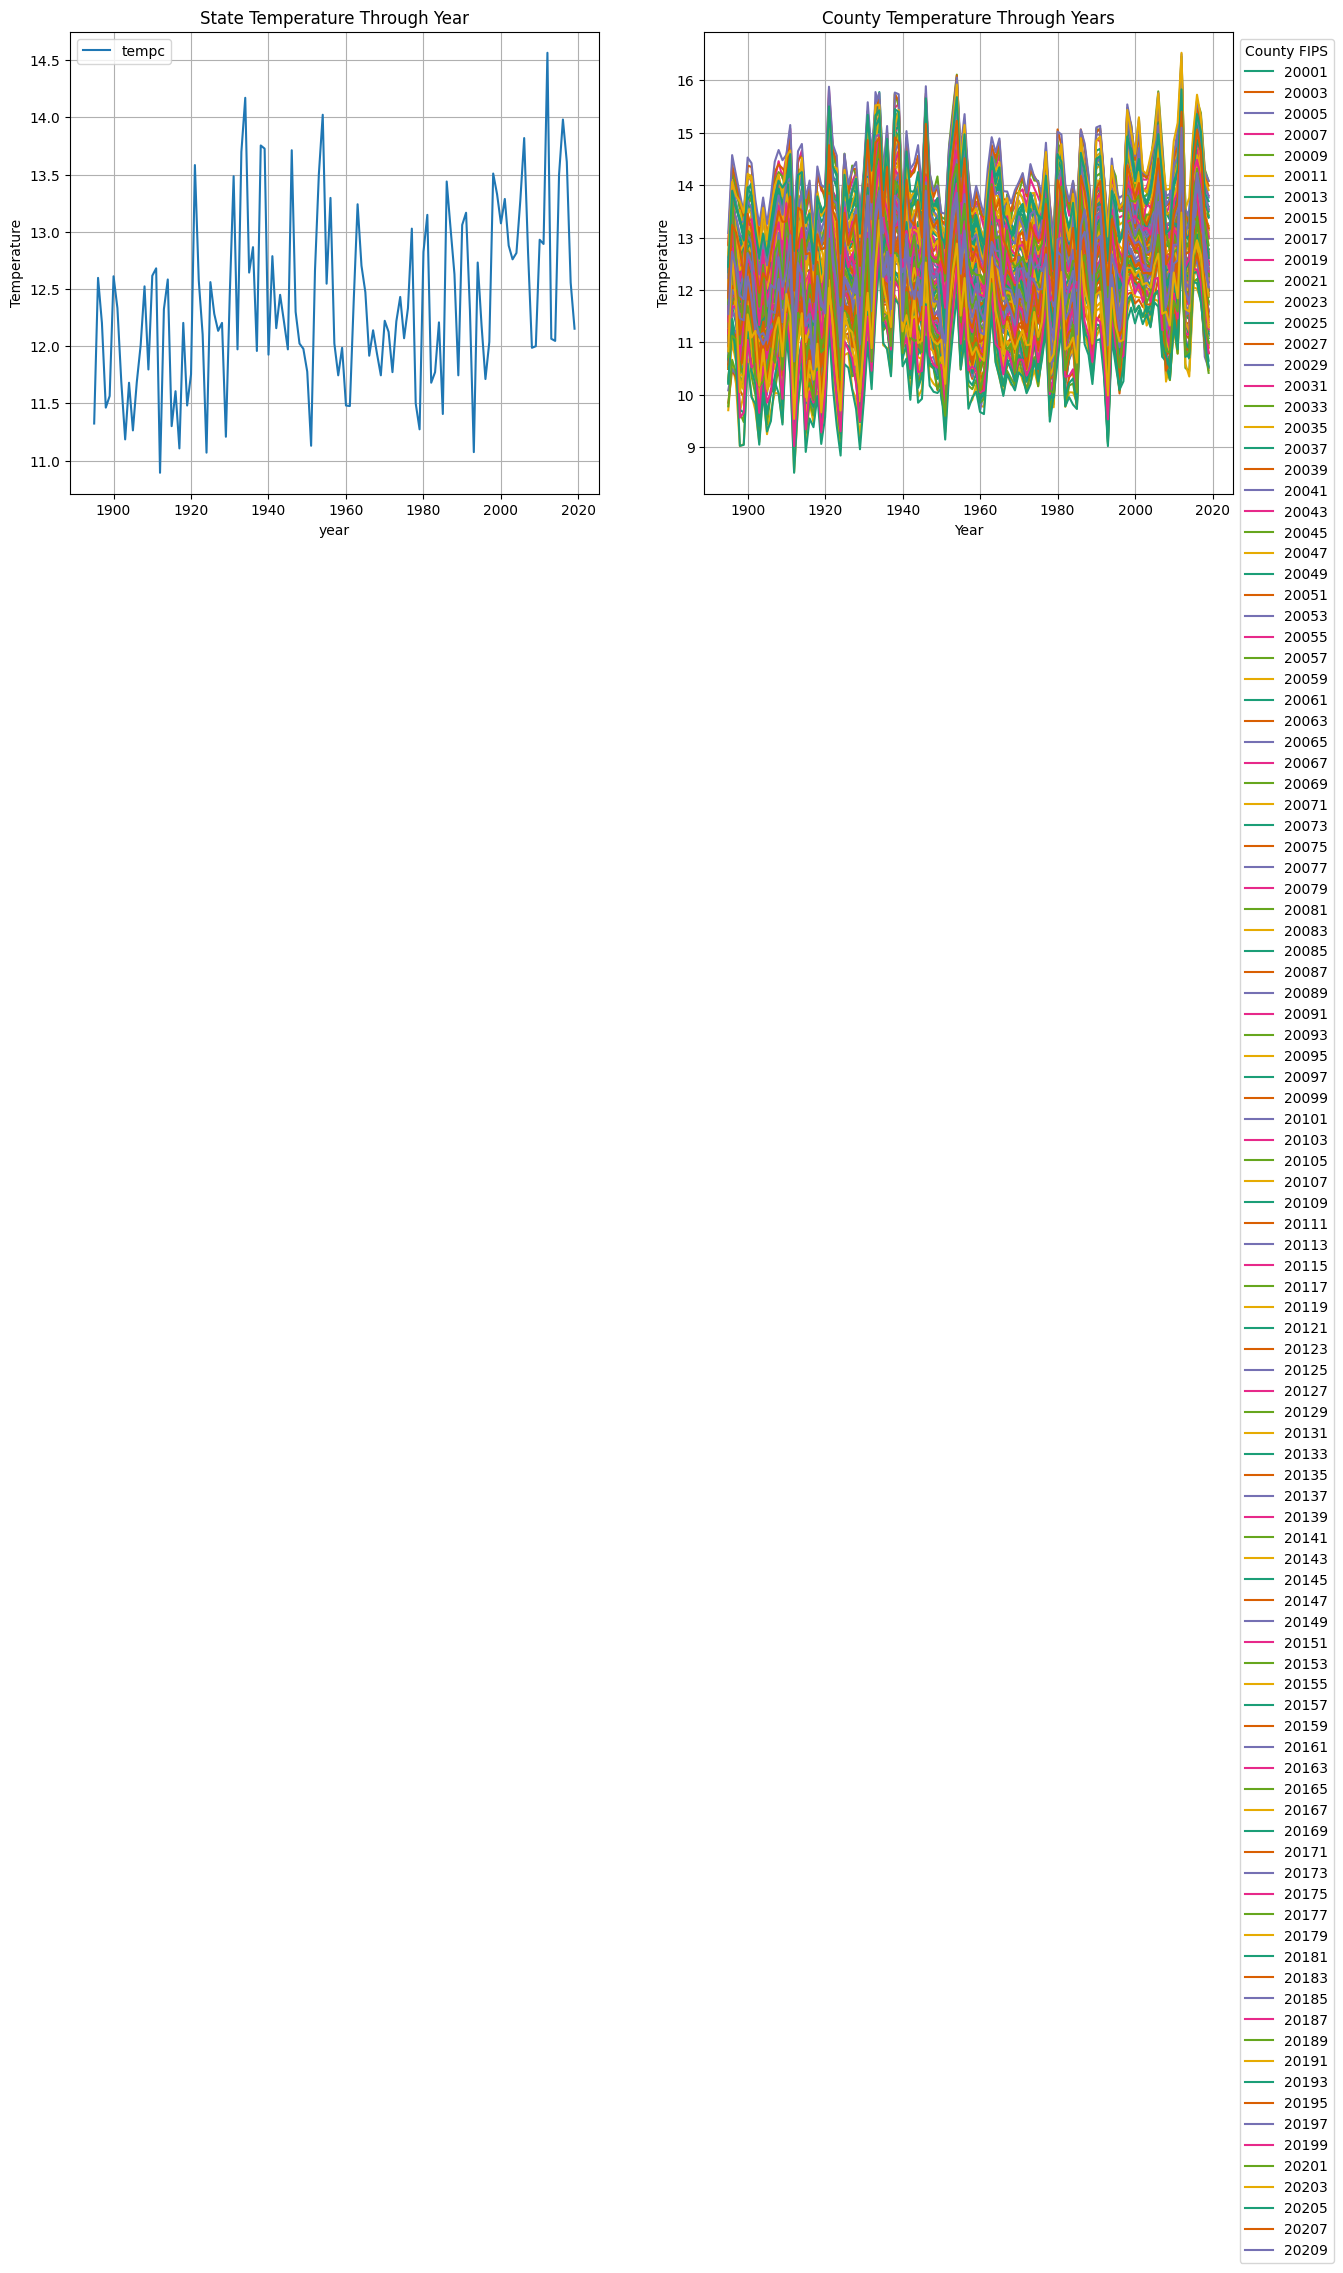

In [15]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Plot Chart 2: State-level temperature
f2 = data_state_year[data_state_year['fips'] == '20']
f2_copy = f2[['year', 'tempc']]
f2_copy.set_index('year', inplace=True)
f2_copy.plot(ax=axs[0], title='State Temperature Through Year', grid = True)
axs[0].set_ylabel('Temperature')

# Plot Chart 1: County-level temperatures
f1 = data_county_year[data_county_year['fips_02'] == '20']
df_sorted = f1.sort_values('year', ascending=True)
palette = list(sns.palettes.mpl_palette('Dark2'))
for i, (series_name, series) in enumerate(df_sorted.groupby('fips_05')):
    axs[1].plot(series['year'], series['tempc'], label=series_name, color=palette[i % len(palette)])
axs[1].set_xlabel('Year')
axs[1].set_ylabel('Temperature')
axs[1].legend(title='County FIPS', bbox_to_anchor=(1, 1), loc='upper left')
axs[1].set_title('County Temperature Through Years')

# Adjust layout and display
plt.tight_layout()
plt.grid(True)
plt.show()

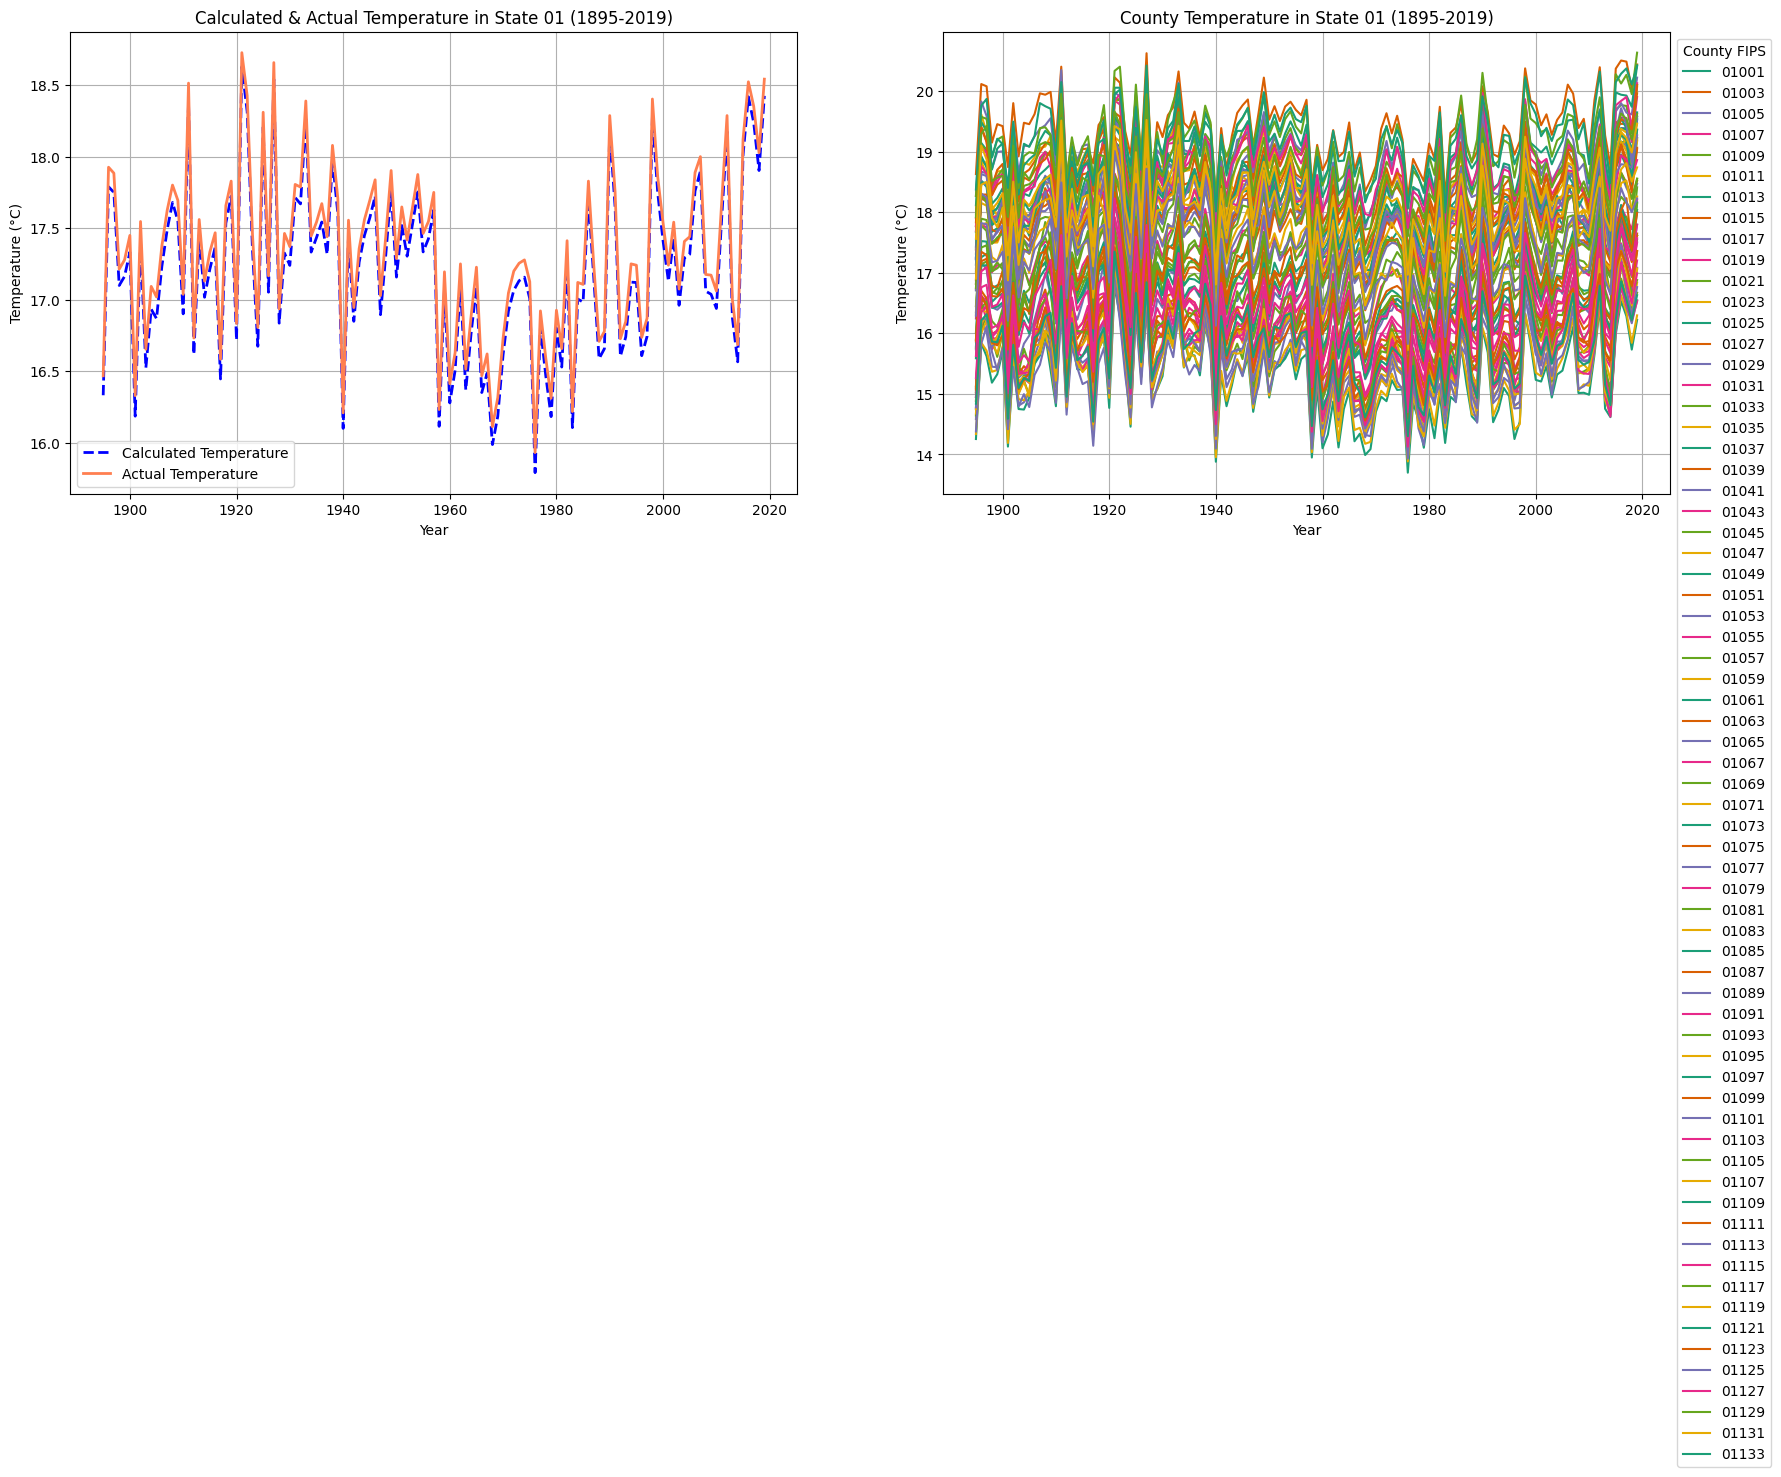

In [16]:
# State selection (can be replaced with user input)
state = '01'

# Filter and calculate mean temperature for county data
state_data_county = data_county_year[(data_county_year['fips_02'] == state) &
                                     (data_county_year['year'] >= 1895) &
                                     (data_county_year['year'] <= 2019)]
mean_temp_by_year_county = state_data_county.groupby('year')['tempc'].mean().reset_index()

# Filter and extract data for state data
state_data = data_state_year[(data_state_year['fips'] == state) &
                                  (data_state_year['year'] >= 1895) &
                                  (data_state_year['year'] <= 2019)]
state_years = state_data['year']
state_temp = state_data['tempc']

# Create a figure with two subplots (adjust figsize as needed)
fig, axs = plt.subplots(1, 2, figsize=(20, 6))

# Plot mean temperature line (dashed) on the first subplot
axs[0].plot(mean_temp_by_year_county['year'], mean_temp_by_year_county['tempc'],
             label='Calculated Temperature', linestyle='dashed', linewidth=2, color='blue')

# Plot actual temperature line (solid) on the first subplot
axs[0].plot(state_years, state_temp, label='Actual Temperature', linewidth=2, color='coral')

# Ensure x and y axes are the same for both subplots
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Temperature (°C)')
axs[0].set_title(f'Calculated & Actual Temperature in State {state} (1895-2019)')
#axs[0].xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
axs[0].grid(True)
axs[0].legend()  # Add legend to distinguish lines

# Plot county-level temperatures on the second subplot
palette = list(sns.palettes.mpl_palette('Dark2'))
for i, (series_name, series) in enumerate(state_data_county.groupby('fips_05')):
    axs[1].plot(series['year'], series['tempc'], label=series_name, color=palette[i % len(palette)])

axs[1].set_xlabel('Year')
axs[1].set_ylabel('Temperature (°C)')
axs[1].legend(title='County FIPS', bbox_to_anchor=(1, 1), loc='upper left')
axs[1].set_title(f'County Temperature in State {state} (1895-2019)')
axs[1].grid(True)

# Adjust spacing between subplots (optional)
plt.subplots_adjust(left=0.1, right=0.9)

plt.show()

In [17]:
import numpy as np
from sklearn.metrics import mean_squared_error

# Ensure both datasets (calculated and actual) are aligned by year
merged_data = pd.merge(mean_temp_by_year_county, state_data, on='year', how='inner')

# Calculate MSE and RMSE
mse = mean_squared_error(merged_data['tempc_x'], merged_data['tempc_y'])
rmse = np.sqrt(mse)

# Print MSE and RMSE values
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Squared Error (MSE): 0.014803642523414992
Root Mean Squared Error (RMSE): 0.12167022036396166


Mean Squared Error (MSE): 0.014803642523414992
Root Mean Squared Error (RMSE): 0.12167022036396166


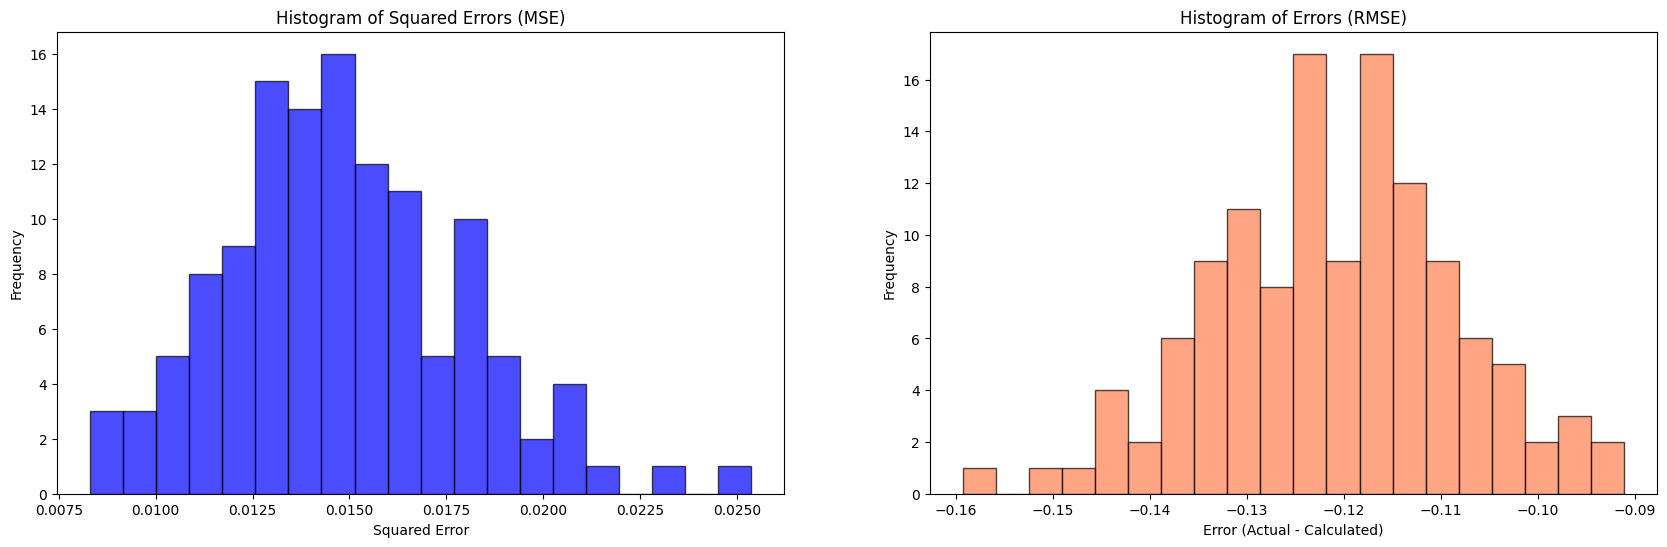

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Ensure both datasets (calculated and actual) are aligned by year
merged_data = pd.merge(mean_temp_by_year_county, state_data, on='year', how='inner')

# Calculate the squared differences for each year (for MSE and RMSE)
squared_errors = (merged_data['tempc_x'] - merged_data['tempc_y']) ** 2
errors = merged_data['tempc_x'] - merged_data['tempc_y']

# Calculate MSE and RMSE
mse = np.mean(squared_errors)
rmse = np.sqrt(mse)

# Print MSE and RMSE values
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Plot histograms for MSE and RMSE
fig, axs = plt.subplots(1, 2, figsize=(20, 6))

# Histogram for Squared Errors (MSE)
axs[0].hist(squared_errors, bins=20, color='blue', alpha=0.7, edgecolor='black')
axs[0].set_title('Histogram of Squared Errors (MSE)')
axs[0].set_xlabel('Squared Error')
axs[0].set_ylabel('Frequency')

# Histogram for Errors (RMSE)
axs[1].hist(errors, bins=20, color='coral', alpha=0.7, edgecolor='black')
axs[1].set_title('Histogram of Errors (RMSE)')
axs[1].set_xlabel('Error (Actual - Calculated)')
axs[1].set_ylabel('Frequency')

# Adjust spacing between subplots
plt.subplots_adjust(left=0.1, right=0.9)

plt.show()

Mean Squared Error (MSE): 0.014803642523414992
Root Mean Squared Error (RMSE): 0.12167022036396166


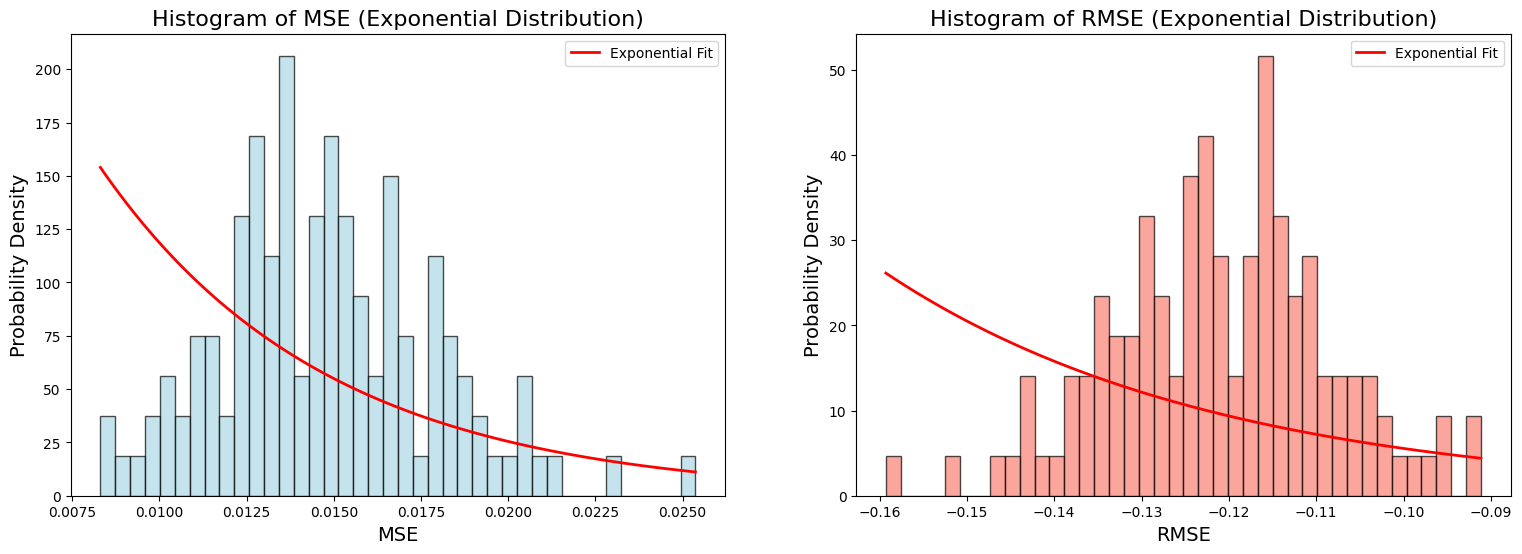

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from scipy.stats import expon

# Ensure both datasets (calculated and actual) are aligned by year
merged_data = pd.merge(mean_temp_by_year_county, state_data, on='year', how='inner')

# Calculate the squared differences for each year (for MSE and RMSE)
squared_errors = (merged_data['tempc_x'] - merged_data['tempc_y']) ** 2
errors = merged_data['tempc_x'] - merged_data['tempc_y']

# Calculate MSE and RMSE
mse = np.mean(squared_errors)
rmse = np.sqrt(mse)

# Print MSE and RMSE values
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Plot histograms for MSE and RMSE
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

# Histogram for Squared Errors (MSE)
axs[0].hist(squared_errors, bins=40, color='lightblue', alpha=0.7, edgecolor='black', density=True)
# Fit an exponential distribution to the squared errors
params_squared = expon.fit(squared_errors)
x_squared = np.linspace(min(squared_errors), max(squared_errors), 100)
axs[0].plot(x_squared, expon.pdf(x_squared, *params_squared), 'r-', label='Exponential Fit', linewidth=2)
axs[0].set_title('Histogram of MSE (Exponential Distribution)', fontsize=16)
axs[0].set_xlabel('MSE', fontsize=14)
axs[0].set_ylabel('Probability Density', fontsize=14)
axs[0].legend()

# Histogram for Errors (RMSE)
axs[1].hist(errors, bins=40, color='salmon', alpha=0.7, edgecolor='black', density=True)
# Fit an exponential distribution to the errors
params_errors = expon.fit(errors)
x_errors = np.linspace(min(errors), max(errors), 100)
axs[1].plot(x_errors, expon.pdf(x_errors, *params_errors), 'r-', label='Exponential Fit', linewidth=2)
axs[1].set_title('Histogram of RMSE (Exponential Distribution)', fontsize=16)
axs[1].set_xlabel('RMSE', fontsize=14)
axs[1].set_ylabel('Probability Density', fontsize=14)
axs[1].legend()

# Adjust spacing between subplots
plt.subplots_adjust(left=0.1, right=0.9)

# Show the plot
plt.show()


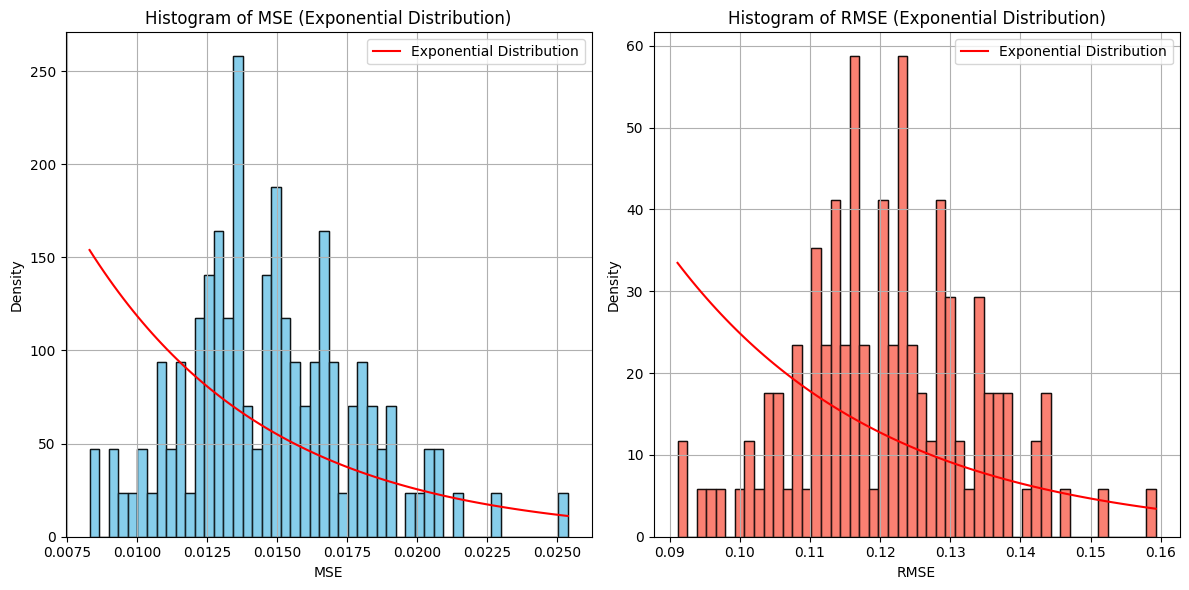

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon
from sklearn.metrics import mean_squared_error
from math import sqrt

# Calculate MSE and RMSE
mse_values = []
rmse_values = []

# Calculate MSE and RMSE for each year
for year in mean_temp_by_year_county['year']:
    calculated_temp = mean_temp_by_year_county[mean_temp_by_year_county['year'] == year]['tempc'].values
    actual_temp = state_temp[state_years == year].values
    if len(calculated_temp) > 0 and len(actual_temp) > 0:
        mse = mean_squared_error(calculated_temp, actual_temp)
        rmse = sqrt(mse)
        mse_values.append(mse)
        rmse_values.append(rmse)

# Create subplots for MSE and RMSE histograms
fig, (ax_mse, ax_rmse) = plt.subplots(1, 2, figsize=(12, 6))

# Plot the histogram for MSE
ax_mse.hist(mse_values, bins=50, color='skyblue', edgecolor='black', density=True)  # Normalize for PDF
counts, bins, patches = ax_mse.hist(mse_values, bins=50, color='skyblue', edgecolor='black', alpha=0.3, density=True)  # Get data for fitting

# Fit an exponential distribution to MSE data
params = expon.fit(mse_values)
x_fit = np.linspace(min(bins), max(bins), 100)
pdf = expon.pdf(x_fit, *params)  # Generate PDF values for the fitted distribution

# Plot the fitted exponential distribution
ax_mse.plot(x_fit, pdf, 'r-', label='Exponential Distribution')
ax_mse.set_title('Histogram of MSE (Exponential Distribution)')
ax_mse.set_xlabel('MSE')
ax_mse.set_ylabel('Density')
ax_mse.grid(True)
ax_mse.legend()  # Add legend for fitted distribution

# Plot the histogram for RMSE
ax_rmse.hist(rmse_values, bins=50, color='salmon', edgecolor='black', density=True)
counts, bins, patches = ax_rmse.hist(rmse_values, bins=50, color='salmon', edgecolor='black', alpha=0.3, density=True)

# Fit an exponential distribution to RMSE data
params = expon.fit(rmse_values)
x_fit = np.linspace(min(bins), max(bins), 100)
pdf = expon.pdf(x_fit, *params)

ax_rmse.plot(x_fit, pdf, 'r-', label='Exponential Distribution')
ax_rmse.set_title('Histogram of RMSE (Exponential Distribution)')
ax_rmse.set_xlabel('RMSE')
ax_rmse.set_ylabel('Density')
ax_rmse.grid(True)
ax_rmse.legend()  # Add legend for fitted distribution

plt.tight_layout()
plt.show()


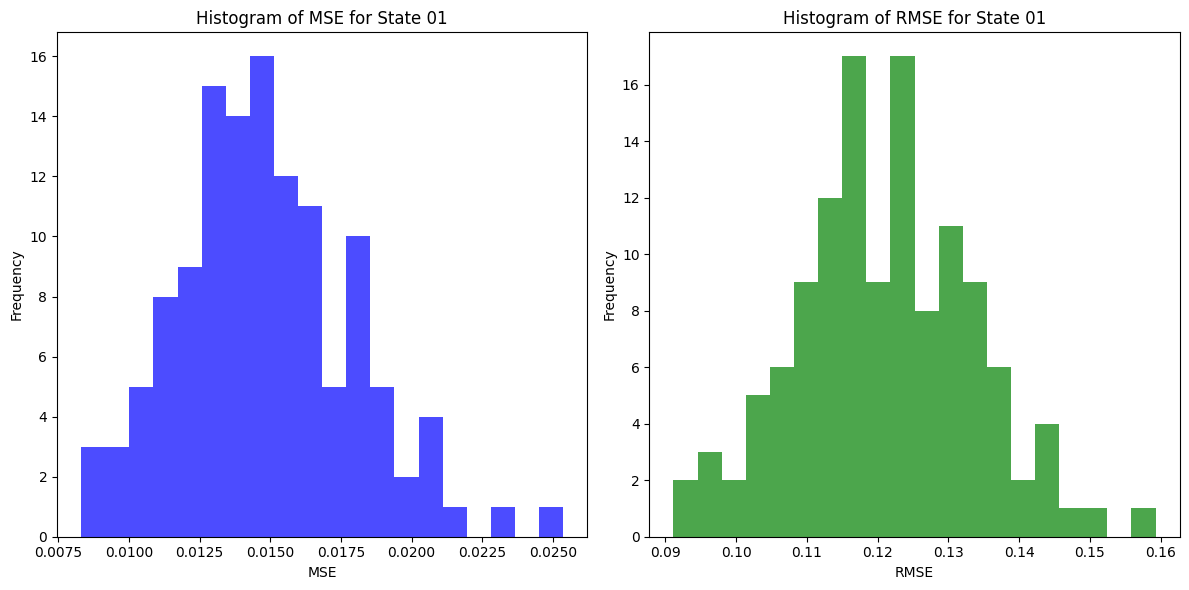

In [21]:
# Ensure both datasets have the same years for comparison
merged_data = mean_temp_by_year_county.merge(state_data, on='year', suffixes=('_calculated', '_actual'))

# Extract the calculated and actual temperature values
calculated_temps = merged_data['tempc_calculated']
actual_temps = merged_data['tempc_actual']

# Calculate the MSE and RMSE values
mse_values = (calculated_temps - actual_temps) ** 2
rmse_values = np.sqrt(mse_values)

# Create a figure and axes
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot the histogram of MSE values
axs[0].hist(mse_values, bins=20, color='blue', alpha=0.7)
axs[0].set_title(f'Histogram of MSE for State {state}')
axs[0].set_xlabel('MSE')
axs[0].set_ylabel('Frequency')

# Plot the histogram of RMSE values
axs[1].hist(rmse_values, bins=20, color='green', alpha=0.7)
axs[1].set_title(f'Histogram of RMSE for State {state}')
axs[1].set_xlabel('RMSE')
axs[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

## Pre-process


In [22]:
f2_copy = f2_copy[['tempc']].values

In [23]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(f2_copy)

In [24]:
# Function to create sequences for LSTM model
def create_sequences(data, sequence_length):
    xs = []
    ys = []
    for i in range(len(data)-sequence_length-1):
        x = data[i:(i+sequence_length)]
        y = data[i+sequence_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

In [25]:
# Prepare the data
sequence_length = 30
X, Y = create_sequences(scaled_data, sequence_length)

In [26]:
# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=10)

In [27]:
# Reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

## LSTM Model


In [28]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [29]:
# Train the model
model.fit(X_train, Y_train, epochs=100, batch_size=64, validation_split=0.1, verbose=1)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 398ms/step - loss: 0.2894 - val_loss: 0.3650
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.1839 - val_loss: 0.2587
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.1072 - val_loss: 0.1706
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.0577 - val_loss: 0.1094
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.0368 - val_loss: 0.0865
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0466 - val_loss: 0.0847
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0526 - val_loss: 0.0870
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0464 - val_loss: 0.0907
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0420 - val_loss: 0.0978
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0367 - val_loss: 0.1128
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0359 - val_loss: 0.1283
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.0387 - val_l

In [30]:
# Predicting and inverse transforming the predictions
predicted_temperature = model.predict(X_test)
predicted_temperature = scaler.inverse_transform(predicted_temperature)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step


In [31]:
# Inverse transform the actual temperature for comparison
actual_temperature = scaler.inverse_transform(Y_test.reshape(-1, 1))

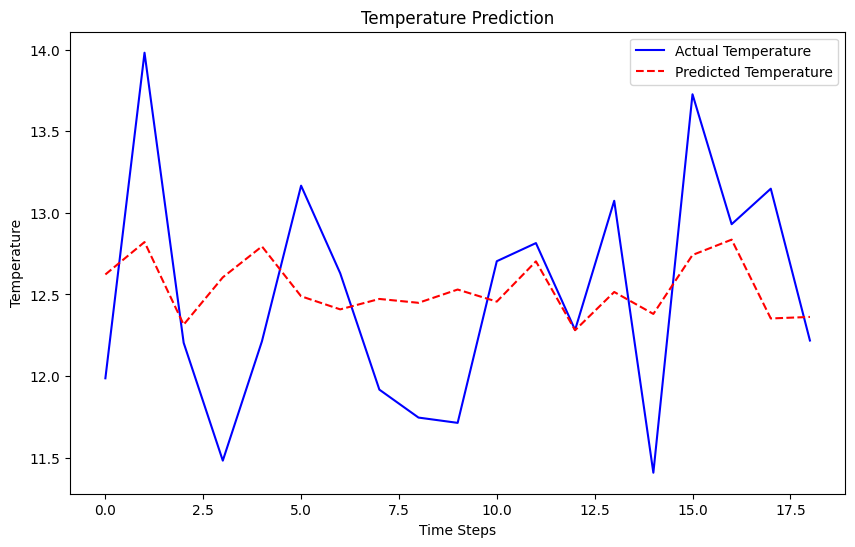

In [32]:
# Visualization
plt.figure(figsize=(10,6))
plt.plot(actual_temperature, color='blue', label='Actual Temperature')
plt.plot(predicted_temperature, color='red', linestyle='--', label='Predicted Temperature')
plt.title('Temperature Prediction')
plt.xlabel('Time Steps')
plt.ylabel('Temperature')
plt.legend()
plt.show()

In [33]:
# Evaluate on the test set
test_loss = model.evaluate(X_test, Y_test, verbose=2)  # Get only the loss
print('\nTest loss:', test_loss)  # Print the loss

# Make predictions on the test set
y_pred = model.predict(X_test)

# Use y_pred instead of Y_pred
mse = mean_squared_error(Y_test, y_pred)
mae = mean_absolute_error(Y_test, y_pred)
rmse = mean_squared_error(Y_test, y_pred, squared=False)
mape = mean_absolute_percentage_error(Y_test, y_pred)

print('MSE:', mse)
print('MAE:', mae)
print('RMSE:', rmse)
print('MAPE:', mape)

1/1 - 0s - 29ms/step - loss: 0.0324

Test loss: 0.032447800040245056
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
MSE: 0.03244779574138166
MAE: 0.15054553313602473
RMSE: 0.18013271702103884
MAPE: 0.4941415439213181


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [34]:
data_national_year = pd.read_csv(path + "/Quack Quack/climdiv_national_year.csv")

In [35]:
data_national_year.describe()

,year,temp,tempc
count,125.000000,125.000000,125.000000
mean,1957.000000,52.216533,11.231407
std,36.228442,0.987160,0.548422
min,1895.000000,50.062500,10.034722
25%,1926.000000,51.550000,10.861111
50%,1957.000000,51.978333,11.099074
75%,1988.000000,52.865833,11.592130
max,2019.000000,55.284167,12.935648


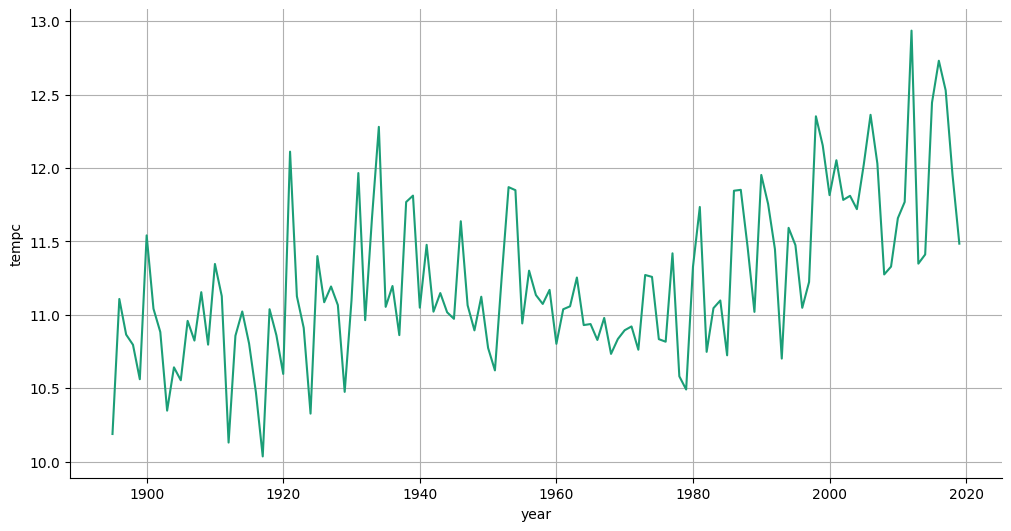

In [36]:
def _plot_series(series, series_name, series_index=0):
    palette = list(sns.palettes.mpl_palette('Dark2'))
    xs = series['year']
    ys = series['tempc']

    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = data_national_year.sort_values('year', ascending=True)
_plot_series(df_sorted, '')

# Add grid
plt.grid(True)

sns.despine(fig=fig, ax=ax)
plt.xlabel('year')
_ = plt.ylabel('tempc')

# Show the plot
plt.show()